In [470]:
import math
from datetime import datetime
import json
from pymongo import MongoClient
import dbQueries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from collections import Counter
sns.set()

In [471]:
plt.style.use('seaborn-notebook')


In [483]:
# Display results per genre
re_json = dbQueries.getTopGenres(10)
df_topGenres = pd.DataFrame.from_dict(re_json)
df_topGenres.head()


,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue
0,Drama,81.121,1169,11.676,8.638,1574308.010,3.377920e+07,4.037743e+07,7.649464e+07,3911999.482
1,Documentary,110.208,1054,2.223,9.383,4910.930,2.550000e+07,3.190621e+07,6.845040e+07,22916.507
2,Comedy,67.746,760,17.191,8.658,2337151.226,3.714242e+07,4.488247e+07,8.158763e+07,4024125.428
3,Music,70.907,529,6.365,9.453,549995.849,5.050000e+07,3.263855e+07,6.939632e+07,1135669.070
4,Romance,88.394,325,13.211,8.599,830369.923,2.663846e+07,3.491543e+07,6.057785e+07,2699984.206


In [473]:
df_topGenres.shape

(10, 10)

In [474]:
df_topGenres.describe()

,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue
count,10.000000,10.000000,10.000000,10.00000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,73.966000,525.400000,21.165000,8.69860,2.355983e+06,4.000419e+07,3.890693e+07,7.783373e+07,4.642771e+06
std,17.432723,347.370823,12.459941,0.41898,2.170878e+06,1.319696e+07,7.055758e+06,1.498427e+07,4.385676e+06
min,45.034000,237.000000,2.223000,8.11500,4.910930e+03,2.550000e+07,3.054113e+07,6.057785e+07,2.291651e+04
25%,64.212000,299.750000,12.059750,8.55925,9.190526e+05,3.036558e+07,3.320777e+07,6.868688e+07,2.243539e+06
50%,72.601500,321.000000,23.342000,8.62650,1.868793e+06,3.546081e+07,3.737013e+07,7.313044e+07,3.899978e+06
75%,80.117250,702.250000,30.569750,8.67075,2.509509e+06,4.879688e+07,4.375621e+07,8.147007e+07,4.491439e+06
max,110.208000,1169.000000,37.374000,9.45300,6.375323e+06,6.533333e+07,5.037111e+07,1.128220e+08,1.511300e+07


In [475]:
# Checking for null values
df_topGenres.isnull().sum()

genres                 0
avgRuntime             0
noMovies               0
avgPopularity          0
avgVotes               0
avgBudget              0
avgProductionBudget    0
avgDomesticBudget      0
avgWorldwideGross      0
avgRevenue             0
dtype: int64

In [476]:
# Checking for duplications
sum(df_topGenres.duplicated())
#df.drop_duplicates(inplace=True)


0

In [477]:
# avgBudget and avgRevenue and etc...

# Replace the value of '0' to NaN
df_topGenres[['avgBudget', 'avgRevenue', 'avgProductionBudget', 'avgDomesticBudget', 'avgWorldwideGross']] = df_topGenres[['avgBudget', 'avgRevenue', 'avgProductionBudget', 'avgDomesticBudget', 'avgWorldwideGross']].replace(0,np.NAN)

# In case of any NaN value exsistance drop them
df_topGenres.dropna(subset=['avgBudget', 'avgRevenue', 'avgProductionBudget', 'avgDomesticBudget', 'avgWorldwideGross'], inplace=True)
print('After cleaning, we have {} rows'.format(df_topGenres.shape[0]))

After cleaning, we have 10 rows


In [485]:
# Average Profits of each ---Genre---

df_topGenres['avgProfit'] = df_topGenres['avgRevenue']-df_topGenres['avgBudget']

df_topGenres['avgProfit'] = df_topGenres['avgProfit'].apply(np.int64)
df_topGenres['avgBudget'] = df_topGenres['avgBudget'].apply(np.int64)
df_topGenres['avgRevenue'] = df_topGenres['avgRevenue'].apply(np.int64)
df_topGenres['avgRuntime'] = df_topGenres['avgRuntime'].apply(np.int64)
df_topGenres['avgVotes'] = df_topGenres['avgVotes'].apply(np.int64)
df_topGenres['avgProductionBudget'] = df_topGenres['avgProductionBudget'].apply(np.int64)
df_topGenres['avgDomesticBudget'] = df_topGenres['avgDomesticBudget'].apply(np.int64)
df_topGenres['avgWorldwideGross'] = df_topGenres['avgWorldwideGross'].apply(np.int64)


df_topGenres.head()


,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue,avgProfit
0,Drama,81,1169,11.676,8,1574308,33779197,40377428,76494637,3911999,2337691
1,Documentary,110,1054,2.223,9,4910,25500000,31906207,68450399,22916,18005
2,Comedy,67,760,17.191,8,2337151,37142424,44882472,81587629,4024125,1686974
3,Music,70,529,6.365,9,549995,50500000,32638549,69396317,1135669,585673
4,Romance,88,325,13.211,8,830369,26638461,34915425,60577854,2699984,1869614


In [479]:
df_topGenres.dtypes

genres                  object
avgRuntime               int64
noMovies                 int64
avgPopularity          float64
avgVotes                 int64
avgBudget                int64
avgProductionBudget      int64
avgDomesticBudget        int64
avgWorldwideGross        int64
avgRevenue               int64
avgProfit                int64
dtype: object

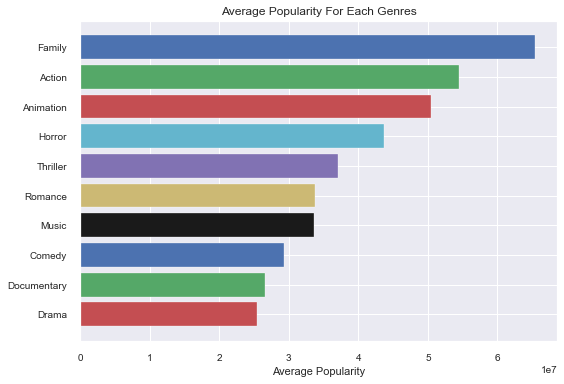

In [494]:
# Average budget for each  ---Genre---

# 7. What is the average avgBudget, avgProfit, avgDomesticBudget, avgWorldwideGross, avgPopularity, avgVotes for top 10 Genres?
# do for all of them: 
my_colors = 'rgbkymc'
genres = df_topGenres['genres']
avgBudget = df_topGenres['avgPopularity'].sort_values() # Here
plt.barh(genres, avgBudget, color= my_colors)

plt.title("Average Popularity For Each Genres")
plt.xlabel("Average Popularity")    
plt.tight_layout()
plt.show()

# With these three figures here we can conclude that if for each genre do more invest it would be more popular between people and as a result earn more profit. 

# do: 
# 1. avgProductionBudget
# 2. avgPopularity
# 3. avgProfit

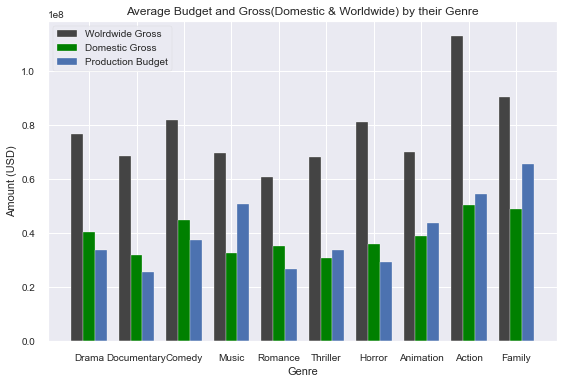

In [505]:


# 8. Comparing the average budget, Domestic Gross, Worldwide Gross for top Genre in the single plot?
import numpy as np 

genres = df_topGenres['genres']

x_indexes=np.arange(len(genres)) 
width=0.25    

avgWorldwideGross = df_topGenres['avgWorldwideGross']
plt.bar(x_indexes - width ,avgWorldwideGross, width=width, label= 'Wolrdwide Gross', color='#444444') 

avgDomesticBudget = df_topGenres['avgDomesticBudget']
plt.bar(x_indexes ,avgDomesticBudget, width=width, label= 'Domestic Gross', color='green' ) 


avgProductionBudget = df_topGenres['avgProductionBudget']
plt.bar(x_indexes + width ,avgProductionBudget, width=width, label= 'Production Budget')  
#---------------------------------------------------------#
plt.xticks(ticks=x_indexes, labels= genres) 
plt.xlabel('Genre')
plt.ylabel('Amount (USD)')
plt.title('Average Budget and Gross(Domestic & Worldwide) by their Genre')
plt.legend()
plt.tight_layout()
plt.show()

In [499]:
# Display results per production companies
re_json = dbQueries.getTopProductionCompanies(10)
df_topCompanies = pd.DataFrame.from_dict(re_json)
df_topCompanies.head(5)

,production_companies,noMovies,avgPopularity,avgVotesNo,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue,avgVotes
0,Universal Pictures,25,52.762,1441.080,2.272000e+07,61400000.0,92396685.9,177364756.8,6.497059e+07,7.448
1,BBC,24,1.944,17.417,1.458333e+06,35000000.0,19389454.0,33422485.0,0.000000e+00,8.571
2,ARTE,22,3.155,70.273,8.540597e+05,12500000.0,4157491.0,45557491.0,1.820788e+06,8.795
3,Canal+,18,10.390,183.278,2.009167e+06,12500000.0,4157491.0,45557491.0,2.024542e+07,7.739
4,Walt Disney Pictures,15,164.935,1476.267,5.826667e+07,94000000.0,41070064.8,75273052.8,3.746845e+07,7.460


In [500]:
# filling 0 values in avgBudget by avgProductionBudget

df_topCompanies['avgBudget'] = np.where(df_topCompanies['avgBudget'] == 0, df_topCompanies['avgProductionBudget'], df_topCompanies['avgBudget'])


In [501]:
# Replacing the 0 values by NaN and then dropping them.

df_topCompanies[['avgBudget','avgRevenue']] = df_topCompanies[['avgBudget','avgRevenue']].replace(0,np.NAN)

df_topCompanies.dropna(subset=['avgBudget', 'avgRevenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df_topCompanies.shape[0]))


After cleaning, we have 6 rows


In [502]:
# average Profits of each Companies
# subtracting the average revenue by avarage budget

df_topCompanies['avgProfit'] = df_topCompanies['avgRevenue']-df_topCompanies['avgBudget']


df_topCompanies['avgProfit'] = df_topCompanies['avgProfit'].apply(np.int64)
df_topCompanies['avgBudget'] = df_topCompanies['avgBudget'].apply(np.int64)
df_topCompanies['avgRevenue'] = df_topCompanies['avgRevenue'].apply(np.int64)
df_topCompanies['avgVotes'] = df_topCompanies['avgVotes'].apply(np.int64)

df_topGenres.head()

,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgProductionBudget,avgDomesticBudget,avgWorldwideGross,avgRevenue,avgProfit
0,Drama,81,1169,11.676,8,1574308,33779197,40377428,76494637,3911999,2337691
1,Documentary,110,1054,2.223,9,4910,25500000,31906207,68450399,22916,18005
2,Comedy,67,760,17.191,8,2337151,37142424,44882472,81587629,4024125,1686974
3,Music,70,529,6.365,9,549995,50500000,32638549,69396317,1135669,585673
4,Romance,88,325,13.211,8,830369,26638461,34915425,60577854,2699984,1869614


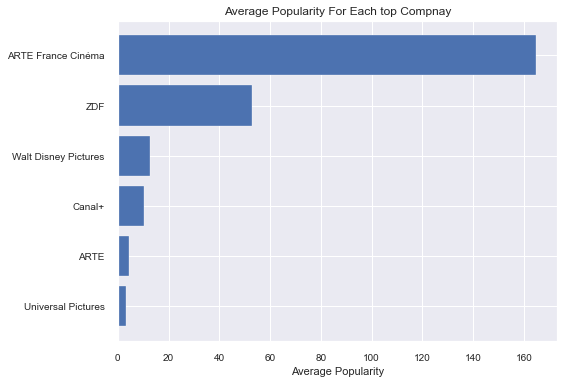

In [504]:
# 9. What is the average avgBudget, avgProfit, avgDomesticBudget, avgWorldwideGross, avgPopularity, avgVotes for top 10 Companies?
# do for all of them: 
plt.style.use('seaborn-notebook')
company = df_topCompanies['production_companies']
avgBudget = df_topCompanies['avgPopularity'].sort_values()
plt.barh(company, avgBudget)           

#plt.xscale('log')
plt.title("Average Popularity For Each top Compnay")
plt.xlabel("Average Popularity")    
plt.tight_layout()
plt.show()

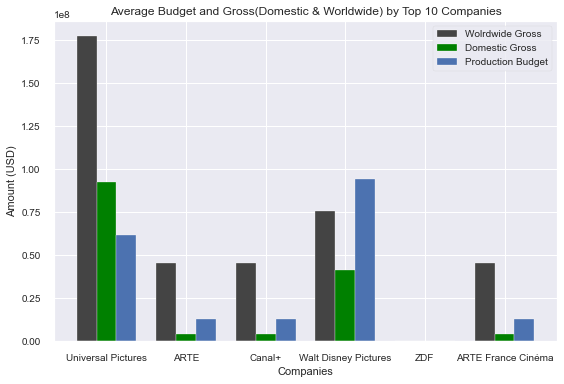

In [506]:
# 10. Comparing the average budget, Domestic Gross, Worldwide Gross for top companies in the single plot?
import numpy as np 

companies = df_topCompanies['production_companies']

x_indexes=np.arange(len(companies)) 
width=0.25    

avgWorldwideGross = df_topCompanies['avgWorldwideGross']
plt.bar(x_indexes - width ,avgWorldwideGross, width=width, label= 'Wolrdwide Gross', color='#444444') 

avgDomesticBudget = df_topCompanies['avgDomesticBudget']
plt.bar(x_indexes ,avgDomesticBudget, width=width, label= 'Domestic Gross', color='green' ) 


avgProductionBudget = df_topCompanies['avgProductionBudget']
plt.bar(x_indexes + width ,avgProductionBudget, width=width, label= 'Production Budget')  
#---------------------------------------------------------#
plt.xticks(ticks=x_indexes, labels= companies) 
plt.xlabel('Companies')
plt.ylabel('Amount (USD)')
plt.title('Average Budget and Gross(Domestic & Worldwide) by Top 10 Companies')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis On Whole Data Set
## Fetching 1000 records of Data From MongoDB (Aggregated_collection)





In [418]:
re_json = dbQueries.wholeData()
# Creates DataFrame object from dictionary by columns or by index allowing dtype specification.
# Of the form {field : array-like} or {field : dict}.
wholeData = pd.DataFrame.from_dict(re_json)
wholeData.head(5)

,title,genres,budget,popularity,production_companies,production_countries,revenue,productionBudget,domesticBudget,worldwideGross,runtime,status,vote_avg,vote_count,release_date
0,Don’t Touch My Foot,"[Comedy, Action]",10,0.820,[Foot News],[United States of America],2,0.0,0.0,0.0,4.0,Released,10.0,1,2020-07-16
1,Commentary Tracks,"[Comedy, Drama]",0,0.600,[Sebs Sine Club],[Indonesia],0,0.0,0.0,0.0,16.0,Released,10.0,1,2020-08-01
2,Taylor & Barinov 2,"[Action, Comedy, Crime]",0,0.600,[],[United Kingdom],0,0.0,0.0,0.0,12.0,Released,10.0,1,2020-09-08
3,Get Lost,[Music],0,0.611,[SADPUNK],[],0,0.0,0.0,0.0,3.0,Released,10.0,1,2020-11-19
4,Capital Clark 4,"[Comedy, Drama]",0,1.422,[],[Canada],0,0.0,0.0,0.0,594.0,Released,10.0,1,2020-11-12


## Quick look at the number of rows, columns, columns names, and their data types, Before any data cleaning.





In [419]:
wholeData.shape

(1000, 15)

In [420]:
wholeData.columns

Index(['title', 'genres', 'budget', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'productionBudget', 'domesticBudget',
       'worldwideGross', 'runtime', 'status', 'vote_avg', 'vote_count',
       'release_date'],
      dtype='object')

In [421]:
wholeData.dtypes


title                    object
genres                   object
budget                    int64
popularity              float64
production_companies     object
production_countries     object
revenue                   int64
productionBudget        float64
domesticBudget          float64
worldwideGross          float64
runtime                 float64
status                   object
vote_avg                float64
vote_count                int64
release_date             object
dtype: object

In [422]:
wholeData.isnull().sum()


title                   0
genres                  0
budget                  0
popularity              0
production_companies    0
production_countries    0
revenue                 0
productionBudget        0
domesticBudget          0
worldwideGross          0
runtime                 2
status                  0
vote_avg                0
vote_count              0
release_date            0
dtype: int64

# Data Cleaning:

In [423]:

# Changing Data Type of Release Date Into Datetime:

wholeData['release_date'] = pd.to_datetime(wholeData['release_date'])
wholeData['release_date'].head()

0   2020-07-16
1   2020-08-01
2   2020-09-08
3   2020-11-19
4   2020-11-12
Name: release_date, dtype: datetime64[ns]

In [424]:
# Filling missing values in budget columns by our another source from web scrapping
wholeData['budget'] = np.where(wholeData['budget'] == 0, wholeData['productionBudget'], wholeData['budget'])


In [425]:

# In case of any missing values in :
# Budget and Revenue
# Replacing'0' by NaN
# Then drop those rows

wholeData[['budget','revenue']] = wholeData[['budget','revenue']].replace(0,np.NAN)

wholeData.dropna(subset=['budget', 'revenue'], inplace=True)
print('After cleaning, we have {} rows'.format(wholeData.shape[0]))

After cleaning, we have 53 rows


In [427]:
# Data Imputation
# Profits of each movie (Subtracting the revenue from budget)

wholeData['profit'] = wholeData['revenue']-wholeData['budget']

# Changing data types
wholeData['profit'] = wholeData['profit'].apply(np.int64)
wholeData['budget'] = wholeData['budget'].apply(np.int64)
wholeData['revenue'] = wholeData['revenue'].apply(np.int64)
wholeData['productionBudget'] = wholeData['productionBudget'].apply(np.int64)
wholeData['domesticBudget'] = wholeData['domesticBudget'].apply(np.int64)
wholeData['worldwideGross'] = wholeData['worldwideGross'].apply(np.int64)





In [430]:
# Data types are changed 

wholeData.dtypes


title                           object
genres                          object
budget                           int64
popularity                     float64
production_companies            object
production_countries            object
revenue                          int64
productionBudget                 int64
domesticBudget                   int64
worldwideGross                   int64
runtime                        float64
status                          object
vote_avg                       float64
vote_count                       int64
release_date            datetime64[ns]
profit                           int64
dtype: object

In [429]:
# Profit column is added

wholeData.head(5)

,title,genres,budget,popularity,production_companies,production_countries,revenue,productionBudget,domesticBudget,worldwideGross,runtime,status,vote_avg,vote_count,release_date,profit
0,Don’t Touch My Foot,"[Comedy, Action]",10,0.820,[Foot News],[United States of America],2,0,0,0,4.0,Released,10.0,1,2020-07-16,-8
13,The New Mutants,"[Action, Horror, Science Fiction]",67000000,391.352,"[Marvel Entertainment, 20th Century Studios, 2...",[United States of America],45534613,67000000,23855569,44615534,94.0,Released,6.4,1465,2020-08-26,-21465387
15,The SpongeBob Movie: Sponge on the Run,"[Animation, Fantasy, Adventure, Comedy, Family]",60000000,383.053,"[United Plankton Pictures, Nickelodeon Movies,...","[South Korea, United States of America]",4700000,0,0,0,95.0,Released,7.8,1989,2020-08-14,-55300000
16,Greenland,"[Action, Thriller]",34000000,361.381,"[STX Entertainment, Thunder Road, Anton, G-BAS...","[United Kingdom, United States of America]",47800000,34000000,0,40411892,120.0,Released,7.1,1692,2020-07-29,13800000
17,Mulan,"[Adventure, Fantasy]",200000000,332.695,"[Walt Disney Pictures, China Film Group Corpor...","[China, United States of America]",57000000,200000000,0,69963008,115.0,Released,7.1,4220,2020-09-04,-143000000


# Data Analysis

In [431]:
# Computes a summary of statistics
# Gives the mean, standard deviation and IQR values. 

wholeData.describe()

,budget,popularity,revenue,productionBudget,domesticBudget,worldwideGross,runtime,vote_avg,vote_count,profit
count,5.300000e+01,53.000000,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,53.000000,53.000000,53.000000,5.300000e+01
mean,2.966870e+07,93.534547,3.151397e+07,1.778679e+07,9.844640e+06,2.241794e+07,79.075472,7.711321,920.566038,1.845274e+06
std,4.996458e+07,223.030553,5.995178e+07,4.052062e+07,2.188674e+07,4.870187e+07,41.212792,1.520964,1364.822749,4.932077e+07
min,1.000000e+00,0.600000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.300000,1.000000,-1.430000e+08
25%,5.000000e+03,0.974000,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,54.000000,6.400000,2.000000,-8.409486e+06
50%,1.000000e+07,31.695000,4.700000e+06,0.000000e+00,0.000000e+00,0.000000e+00,95.000000,7.200000,429.000000,-4.900000e+03
75%,2.900000e+07,60.549000,4.088293e+07,1.800000e+07,1.359051e+07,2.205921e+07,105.000000,9.000000,1042.000000,4.472775e+06
max,2.000000e+08,1503.639000,3.067665e+08,2.000000e+08,1.103594e+08,2.511247e+08,133.000000,10.000000,6476.000000,2.217665e+08


In [432]:
 # Select the lowest and hisghest value from a given column 

def find_min_max(col_name):
    #using idxmin()  and idxmax() functions to find min and max value of the given column.
    #idxmin to find the index of lowest in given col_name
    min_index = wholeData[col_name].idxmin()
    #idxmax to find the index of highest in given col_name
    max_index = wholeData[col_name].idxmax()
    #select the lowest and hisghest value from given col_name
    low  = pd.DataFrame(wholeData.loc[min_index,:])
    high = pd.DataFrame(wholeData.loc[max_index,:])  
    #Print the results  
    print('Movie which has highest '+col_name+' : ', wholeData['title'][max_index])
    print('Movie which has lowest '+col_name+' : ', wholeData['title'][min_index])
    return pd.concat([high,low], axis=1)
    # A DataFrame object has two axes: “axis 0” and “axis 1”.
    #  “axis 0” represents rows and “axis 1” represents columns
    # Concatenate  objects along a particular axis.

In [433]:
# Finding the top 10 from a given column 

def top_10(col_name,size=10):
    # First sort values
    df_sorted = pd.DataFrame(wholeData[col_name].sort_values(ascending=False))[:size]
    df_sorted['title'] = wholeData['title']
    plt.figure(figsize=(12,6))
    #Calculate the avarage
    avg = np.mean(wholeData[col_name])   
    sns.barplot(x=col_name, y='title', data=df_sorted, label=col_name)
    # Add a vertical line across the axes. (For avg)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + col_name.capitalize())
    plt.legend()


In [437]:
# 1.  Which movie has the highest and lowest profit in our dataset?

find_min_max('profit')


Movie which has highest profit :  Sonic the Hedgehog
Movie which has lowest profit :  Mulan


,64,17
title,Sonic the Hedgehog,Mulan
genres,"[Action, Science Fiction, Comedy, Family]","[Adventure, Fantasy]"
budget,85000000,200000000
popularity,125.925,332.695
production_companies,"[Original Film, Blur Studios, Marza Animation ...","[Walt Disney Pictures, China Film Group Corpor..."
production_countries,"[Japan, United States of America]","[China, United States of America]"
revenue,306766470,57000000
productionBudget,0,200000000
domesticBudget,0,0
worldwideGross,0,69963008


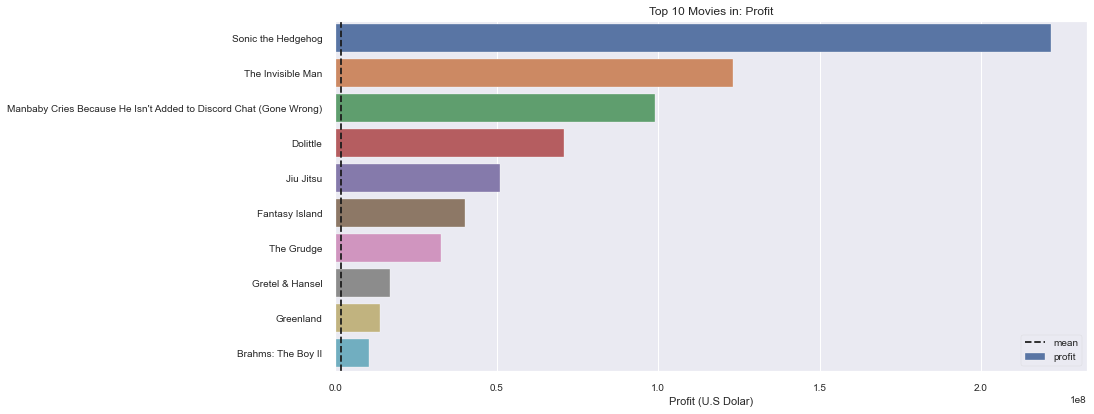

In [435]:
# 2. What are the top 10 movies in profit?
top_10('profit')


In [438]:
# 3. Which movie has the highest and lowest budget in our dataset?

find_min_max('budget')


Movie which has highest budget :  Mulan
Movie which has lowest budget :  Manbaby Cries Because He Isn't Added to Discord Chat (Gone Wrong)


,17,381
title,Mulan,Manbaby Cries Because He Isn't Added to Discor...
genres,"[Adventure, Fantasy]",[War]
budget,200000000,1
popularity,332.695,0.6
production_companies,"[Walt Disney Pictures, China Film Group Corpor...",[Alwharf Studios]
production_countries,"[China, United States of America]",[]
revenue,57000000,99000000
productionBudget,200000000,0
domesticBudget,0,0
worldwideGross,69963008,0


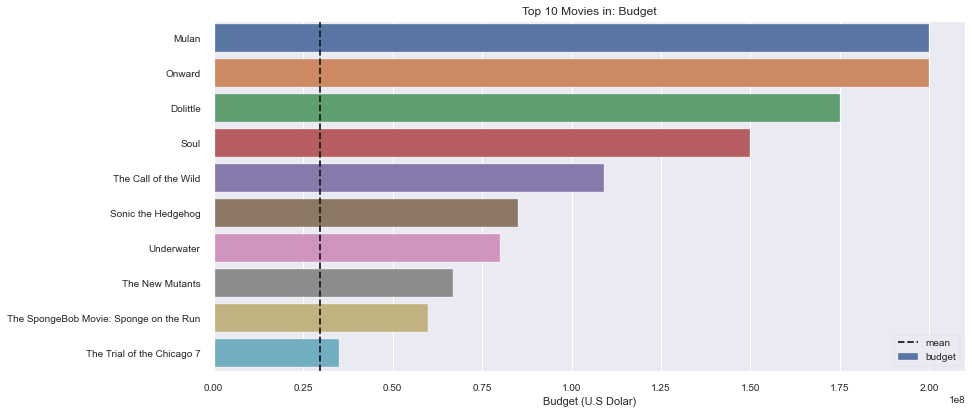

In [439]:
# 4. What are the top 10 movies in budget?

top_10('budget')


In [440]:
# 5. Which movie has the highest and lowest revenue in our dataset?

find_min_max('revenue')


Movie which has highest revenue :  Sonic the Hedgehog
Movie which has lowest revenue :  Rocky Horror Remade


,64,407
title,Sonic the Hedgehog,Rocky Horror Remade
genres,"[Action, Science Fiction, Comedy, Family]","[Horror, Animation, Music, Comedy, Science Fic..."
budget,85000000,1
popularity,125.925,1.96
production_companies,"[Original Film, Blur Studios, Marza Animation ...",[The Player's Society]
production_countries,"[Japan, United States of America]",[United States of America]
revenue,306766470,1
productionBudget,0,0
domesticBudget,0,0
worldwideGross,0,0


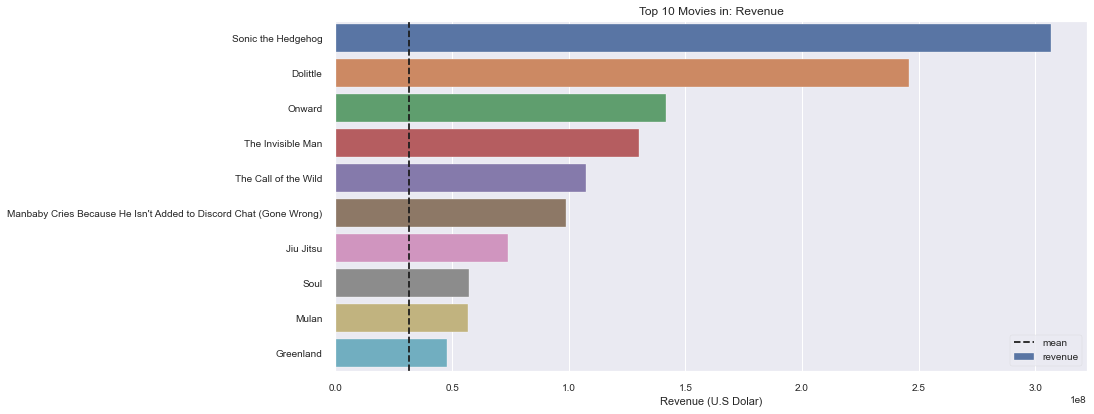

In [441]:
# 6. What are the top 10 movies in revenue?

top_10('revenue')


In [446]:
# 7. Which movie has the highest and lowest runtime in our dataset?
# Starting of the movie upto the end of the credits scene.

find_min_max('runtime')


Movie which has highest runtime :  Mank
Movie which has lowest runtime :  ALL COPS AIN'T BAD


,218,650
title,Mank,ALL COPS AIN'T BAD
genres,"[Drama, History]",[Comedy]
budget,20000000,100000
popularity,31.695,0.721
production_companies,[Netflix International Pictures],[VH2 Networks]
production_countries,[United States of America],[United States of America]
revenue,100000,350000
productionBudget,0,0
domesticBudget,0,0
worldwideGross,0,0


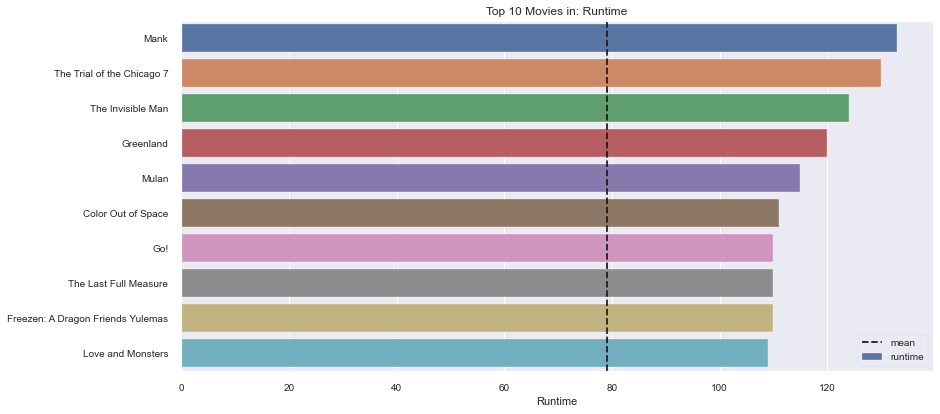

In [445]:
# 8. What are the top 10 movies in runtime?

top_10('runtime')


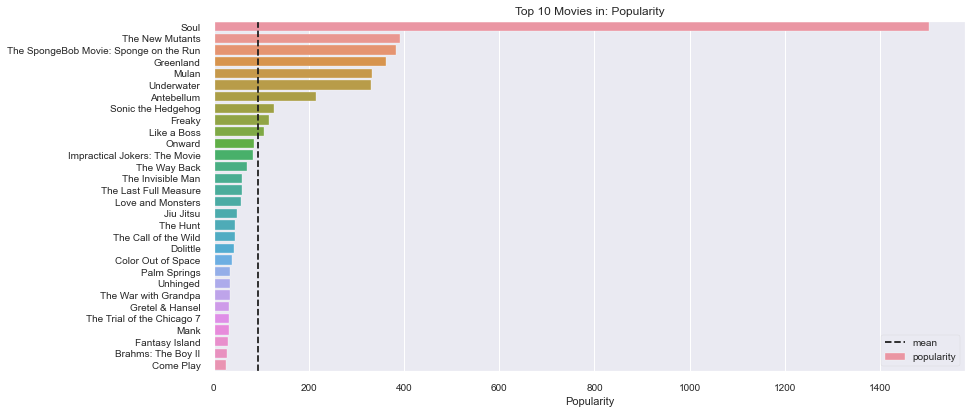

In [448]:
# 9. What are the top 30 movies in popularity?
top_10('popularity', size=30)


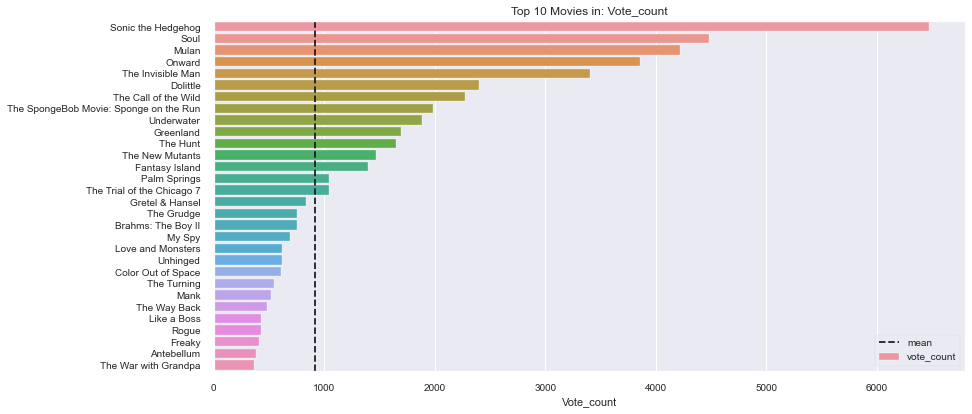

In [447]:
# 10. What are the top 30 movies in vote_count?
# vote_count: The number of votes by users, as counted by TMDB.

top_10('vote_count', size=30)


Text(0.5, 1.0, 'Total profit by month')

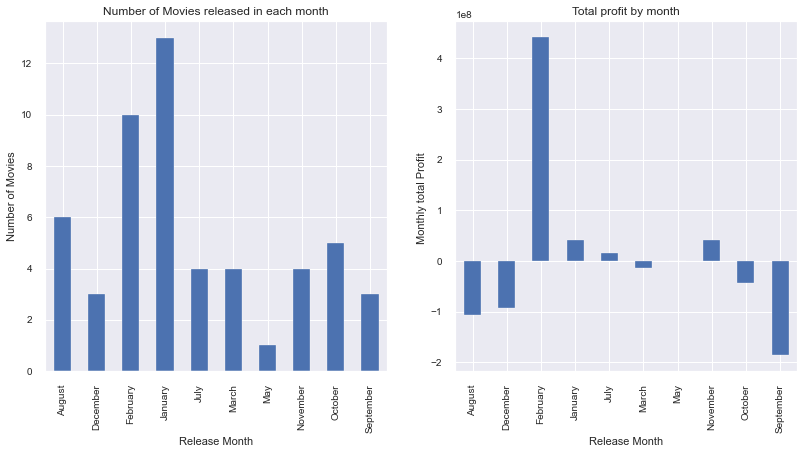

In [450]:
# Defining a function for
#  number of movies released per month 
# total profit per month

# make a copy of data frame
df_month = wholeData.copy()
# selecting the month
# Convert to Index using specified date_format here as month
df_month['release_month'] = df_month['release_date'].dt.strftime("%B")

fig = plt.figure(figsize=(12,6))
# counting the number of movies, groupby month
count_month = df_month.groupby('release_month')['profit'].count()
plt.subplot(1,2,1) # One row, Two columns, put in the fist column
count_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.title('Number of Movies released in each month')

plt.subplot(1,2,2) # One row, Two columns, put in the second column
# calculating the profit, group by month
sum_month = df_month.groupby('release_month')['profit'].sum()

sum_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Monthly total Profit ')
plt.title('Total profit by month')


In [452]:

def plot_correlation_map( wholeData ):
    corr = wholeData.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) ) # width, height in inches.
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True ) 
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, 
                    annot = True, annot_kws = { 'fontsize' : 12 })

# 1. sns.diverging_palette:
                    
# Make a diverging palette between two HUSL colors.

# as_cmapbool, optional
# If True, return a matplotlib.colors.Colormap.

# 2. sns.heatmap:

# Plot rectangular data as a color-encoded matrix.

# cbar: Whether to draw a colorbar.
# ax: Axes in which to draw the plot, otherwise use the currently-active Axes
# annot: If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.
# annot_kws: Keyword arguments for matplotlib.axes.Axes.text() when annot is True.
# Square: If True, set the Axes aspect to “equal” so each cell will be square-shaped.






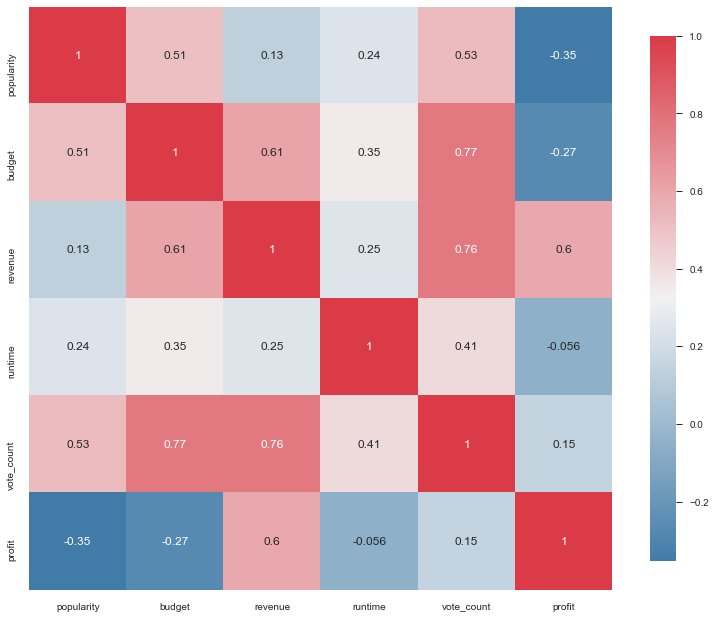

In [454]:
plot_correlation_map(wholeData[['popularity','budget','revenue','runtime','vote_count', 'profit']])
# this plot is showing budget and revenue have a positive high correlation, it is obvious that with more investment would have more revenues or vote counts. 

# More Budget /// More Revenue ///  Get more vote - be popular ---> Achive more profit
